In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt

import PyCapture2 as pc2
import devices.Camera
import daq
%load_ext autoreload
%autoreload 1

In [2]:
%aimport devices.Camera
cam = devices.Camera.Camera(17583372)

Camera ID: Blackfly BFLY-PGE-31S4M,17583372,FV:1.61.3.0


In [3]:
info = cam.cam.getGigEImageSettings()
info.pixelFormat

2097152

In [4]:
pc2.PIXEL_FORMAT.RAW16

2097152

In [5]:
image = cam.take_photo()

In [6]:
print(len(image.getData())/(2048*1536))
print(image.getData()[0:100])

2.0
[0, 15, 32, 15, 0, 15, 240, 14, 224, 14, 0, 15, 32, 15, 32, 15, 240, 14, 0, 15, 16, 15, 240, 14, 0, 15, 0, 15, 16, 15, 0, 15, 0, 15, 16, 15, 240, 14, 16, 15, 16, 15, 240, 14, 48, 15, 32, 15, 16, 15, 224, 14, 16, 15, 0, 15, 240, 14, 32, 15, 0, 15, 0, 15, 0, 15, 16, 15, 240, 14, 32, 15, 16, 15, 0, 15, 0, 15, 16, 15, 240, 14, 16, 15, 32, 15, 0, 15, 16, 15, 0, 15, 16, 15, 32, 15, 16, 15, 48, 15]


In [7]:
%timeit image.save(b'/media/robert/Data_Storage/daq/test.tiff', pc2.IMAGE_FILE_FORMAT.TIFF)

71.4 ms ± 332 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


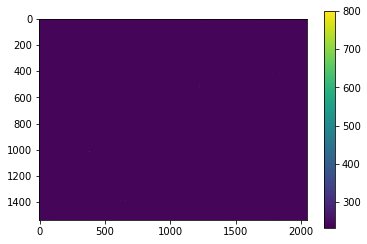

In [8]:
tiff = plt.imread('/media/robert/Data_Storage/daq/test.tiff')
plt.imshow(tiff/16)
plt.colorbar()
plt.show()

In [9]:
from PIL import Image
im = Image.open('/media/robert/Data_Storage/daq/test.tiff')
im.info

{'compression': 'tiff_lzw', 'dpi': (72.0, 72.0)}

In [10]:
shutPROP = pc2.PROPERTY_TYPE.SHUTTER
shut = cam.cam.getProperty(shutPROP)
print(shut)

In [11]:
cam.cam.disconnect()

In [2]:
daq.main([['Camera'], [17583372], 'cam_test', 10])

Camera ID: Blackfly BFLY-PGE-31S4M,17583372,FV:1.61.3.0
Total number of attempted measurements:  10
Number of successful measurements:       10
Total number of failed measurements:     0
Total measurement time:                  0.88 s
